# "Functions Description"
> "Going through some functions and classes that will be extensively used in blog"
- toc: true
- branch: master
- badges: true
- comments: true
- permalink: /first-post/
- hide: true
- categories: [d2l, deeplearning, jupyter]

## 1.1 Plotting functions

In [177]:
# hide
from matplotlib import pyplot as plt
from typing import Union, Tuple, List
from IPython import display
import numpy as np

%matplotlib inline

Below is the main plotting function, which is creates or uses existing axes to plot multiple functions. Optionally we apply scaling and limits x and y values. 

From the functions point of view there is nothing reall interesting goin on. I provided key comments below in most places. 

```python
from pyomo.environ import *
model = Concretemodel()
```

In [178]:
# collapse
def set_axes(axes: plt.Axes, xlabel: str, ylabel: str, 
             xlim: Union[int, float], ylim: Union[int, float],
             xscale: str, yscale: str, legend: List[str]) -> plt.Axes:
    """
    Customizes the provided axes according to the provided parameters
    """
    # set labels
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    
    # must be used before setting `xlim` and `ylim` to avoid distorting the graph
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    
    # set limits
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    
    # add legend
    if legend is not None: axes.legend(legend)
    
    # add square grid
    axes.grid()
    
    return axes

def set_global_graph_params(figsize: Tuple[float, float] = (3.5, 2.5),
                            darkmode: bool = False):
    """
    Use plt parameters to set the figure size and background style.
    
    For more details please refer to https://matplotlib.org/3.5.0/tutorials/introductory/customizing.html#customizing-with-dynamic-rc-settings
    """
    # set size of the figure
    plt.rcParams['figure.figsize'] = figsize
    
    display.set_matplotlib_formats('svg')
    # use if dark background is enables
    if darkmode: plt.style.use("dark_background") 


    
def plot(X: Union[list, torch.Tensor], Y:Union[list, torch.Tensor] = None, 
         xlabel: str = None, ylabel: str = None, legend: List[str] = None, xlim: Union[int, float] = None, 
         ylim: Union[int, float] = None, xscale: str = 'linear', yscale: str = 'linear',
         fmts: Tuple[str] = ('-', 'm--', 'g-.', 'r:'), 
         figsize: Tuple[float, float] = (3.5, 2.5), axes: plt.Axes = None, darkmode: bool =  False):
    """
    Main plotting function that takes `X` as an array and Y as a list of tensors (functions on `X`).
    Optionally applies scaling and limits on x and y axis
    """
    
    set_global_graph_params(figsize, darkmode)
    axes = axes if axes else plt.gca()
    
    def has_one_axis(X):
        """
        Check if X is a 1-d list of 1-d tensor / array
        """
        return (hasattr(X, "ndim") and X.ndim == 1) or \
        (isinstance(X, list) and (not hasattr(X[0], "__len__")))
    
    if has_one_axis(X):
        X = [X]  # for the step below when we repeat X the len(y) times. Without it list will just increase in size
    if Y is None:
        X, Y = [[]]*len(X), X #  convenience to run the loop below (zip). Basically allows falls to the `axes.plot(y, fmt)`
    elif has_one_axis(Y):
        Y = [Y]
    
    # adjust `X` for the length of `Y` by repeating `X` len(`Y`) times
    if len(X) != len(Y):
        X = X * len(Y)
        
    if axes is None: axes = plt.gca()
    plt.cla()
    
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
            
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

#### Examples

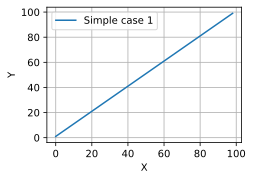

In [179]:
X = list(range(1, 100, 1))
plot(X=X, xlabel="X", ylabel="Y", legend=["Simple case 1"])

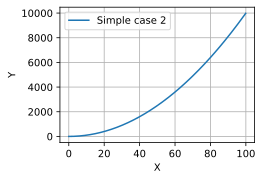

In [180]:
X = np.arange(0, 100, 0.1)
plot(X=X, Y=[x**2 for x in X], xlabel="X", ylabel="Y", legend=["Simple case 2"])

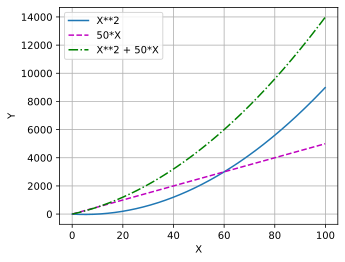

In [181]:
X = np.arange(0, 100, 0.1)
Y1 = X**2 - 10*X
Y2 = 50*X
Y3 =  Y1 + Y2
plot(X=X, Y=[Y1, Y2, Y3], xlabel="X", ylabel="Y", legend=["X**2", "50*X", "X**2 + 50*X"], figsize=[5, 4])